In [1]:
# Final Project - Stock Market Simulation - Garrett Allen

In [2]:
# Garrett Allen
import numpy as np
import matplotlib.pyplot as plt
import scipy.special as ss
from scipy.special import binom
from numpy import random
from scipy.stats import norm
import math
from scipy.stats import stats
from scipy.special import beta
from scipy.signal import convolve
from mpl_toolkits import mplot3d
from numpy.random import default_rng
rand = default_rng().random
from scipy.integrate import odeint

In [3]:
# Changes
Normal_Up =     1 + (2.5 / 100)
Normal_Down =   1 - (2.2 / 100)
Large_Up =      1 + (4 / 100)
Large_Down =    1 - (6.2 / 100)
Crash =         1 - (30 / 100)

# Occurences
wNormal_Up =     1 / 2.2
wNormal_Down =   1 / 2.7
wLarge_Up =      1 / 14
wLarge_Down =    1 / 12
wCrash =         1 / 365

check = wNormal_Up+wNormal_Down+wLarge_Up+wLarge_Down+wCrash
print("Percent of Days that the Market will move = ",check*100,"%")

#Sections
sc = wCrash
sld = wCrash + wLarge_Down
slu = sld + wLarge_Up
snd = slu + wNormal_Down
snu = snd + wNormal_Up

Percent of Days that the Market will move =  98.24174557051268 %


In [4]:
# Average Market Trend Over a Year
average_change = ((-(1-Crash)) * wCrash) + ((-(1-Large_Down)) * wLarge_Down) + ((-(1-Large_Up)) * wLarge_Up) + ((-(1-Normal_Down)) * wNormal_Down) + ((-(1-Normal_Up)) * wNormal_Up)
print("Average Market Change Over a Year = ",average_change*100000,"%")

Average Market Change Over a Year =  8.40465977451771 %


In [36]:
Start_Value = 100    #Price that the market will start at
days = 10            #How many days after day 0 that the market will run for 
bank = 500           #How much total money you can invest


value = Start_Value
market = [Start_Value]
day_change = [0]
for i in range(days):
    rng = random.uniform(0,1)
    #print(rng)
    
    x = 1
    if rng < sc:
        x = Crash
    elif rng > sc and rng < sld:
        x = Large_Down
    elif rng > sld and rng < slu:
        x = Large_Up
    elif rng > slu and rng < snd:
        x = Normal_Down
    elif rng > snd and rng < snu:
        x = Normal_Up
    else:
        x = 1
    
    print(x)
    day_change = np.append(day_change,x)
    value = value * x
    
    market = np.append(market,value)

#print(market)

X = np.linspace(0,days,days+1)

1.025
0.978
0.978
1.025
1.025
1.025
1.04
1.025
1.025
1.025


In [60]:
average_return_per_day = average_change / 365 * 1000
print(average_return_per_day)
w = np.linspace(0,days,days+1)
z = (Start_Value - 1) + (np.exp(average_return_per_day*w))


0.00023026465135664957


Text(0.5, 0, 'Day')

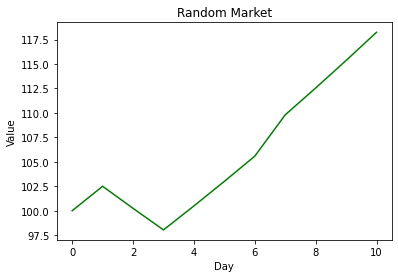

In [38]:
plot = plt.plot(X,market,'g-')
plt.title('Random Market')
plt.ylabel('Value')
plt.xlabel('Day')


In [39]:
print(market)
print(day_change)

[100.         102.5        100.245       98.03961    100.49060025
 103.00286526 105.57793689 109.80105436 112.54608072 115.35973274
 118.24372606]
[0.    1.025 0.978 0.978 1.025 1.025 1.025 1.04  1.025 1.025 1.025]


In [51]:
# Investing All Day 1
invest = np.zeros((days+1,), dtype=int)
invest[1] = bank

print(invest)

invest_value = 0
ivk = []

for j in range (days+1):
    invest_value = (invest[j] + invest_value) * day_change[j]
    ivk = np.append(ivk,invest_value)
    
print(ivk)


[  0 500   0   0   0   0   0   0   0   0   0]
[  0.         512.5        501.225      490.19805    502.45300125
 515.01432628 527.88968444 549.00527182 562.73040361 576.7986637
 591.21863029]


In [52]:
# Investing Linear
invest2 = np.zeros((days+1,), dtype=int)

for k in range (days):
    invest2[k+1] = bank / days


print(invest2)

invest_value2 = 0
ivk2 = []

for j in range (days+1):
    invest_value2 = (invest2[j] + invest_value2) * day_change[j]
    ivk2 = np.append(ivk2,invest_value2)

print(ivk2)


[ 0 50 50 50 50 50 50 50 50 50 50]
[  0.          51.25        99.0225     145.744005   200.63760512
 256.90354525 314.57613388 379.15917924 439.88815872 502.13536269
 565.93874676]


TypeError: 'str' object is not callable

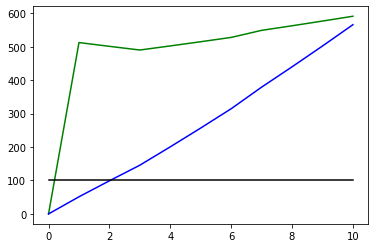

In [64]:
# Plots
plt.plot(X,ivk,'g')
plt.plot(X,ivk2,'b')
plt.plot(X,z,'k')
plt.xlabel('Day')